In [13]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms 
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

# Definir transformaciones para las imágenes
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Preprocesamiento de los datos
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_dataset = ImageFolder("/content/drive/MyDrive/Pytorch_Tensorflow/Images_Clasification/Own-data-clasification/", transform=train_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


# Cargar imágenes de validación
validation_data = datasets.ImageFolder('/content/drive/MyDrive/Pytorch_Tensorflow/Images_Clasification/Own-data-clasification/',
                                        transform=transform)

# Definir cargador de datos de validación
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=32,
                                                shuffle=True, num_workers=2)
# Definir la arquitectura de la red neuronal
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(64 * 28 * 28, 512),
    nn.ReLU(),
    nn.Linear(512, 1),
    nn.Sigmoid()
)

# Definir la función de pérdida y el optimizador
criterion = nn.BCELoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

# Entrenar el modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 15
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    train_loss = 0
    val_loss = 0
    train_acc = 0
    val_acc = 0
    total_train = 0
    total_val = 0
    
    # Entrenamiento
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = criterion(outputs, labels.float().unsqueeze(1))
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        total_train += len(labels)
        train_acc += (outputs.round() == labels.unsqueeze(1)).sum().item()
        
    # Validación
    model.eval()
    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels.float().unsqueeze(1))

            val_loss += loss.item()
            total_val += len(labels)
            val_acc += (outputs.round() == labels.unsqueeze(1)).sum().item()
    
    train_losses.append(train_loss / total_train)
    val_losses.append(val_loss / total_val)
    train_accs.append(train_acc / total_train)
    val_accs.append(val_acc / total_val)
    
    print(f"Epoch {epoch+1}/{num_epochs} -- Train Loss: {train_losses[-1]:.4f} -- Val Loss: {val_losses[-1]:.4f} -- Train Accuracy: {train_accs[-1]:.4f} -- Val Accuracy: {val_accs[-1]:.4f}")


Epoch 1/15 -- Train Loss: 1.3686 -- Val Loss: 1.9324 -- Train Accuracy: 0.4275 -- Val Accuracy: 0.4046
Epoch 2/15 -- Train Loss: 1.7611 -- Val Loss: 1.8262 -- Train Accuracy: 0.4046 -- Val Accuracy: 0.4046
Epoch 3/15 -- Train Loss: 1.7369 -- Val Loss: 1.9175 -- Train Accuracy: 0.4046 -- Val Accuracy: 0.4046
Epoch 4/15 -- Train Loss: 1.8120 -- Val Loss: 1.7793 -- Train Accuracy: 0.4046 -- Val Accuracy: 0.4046
Epoch 5/15 -- Train Loss: 1.8933 -- Val Loss: 1.8675 -- Train Accuracy: 0.4046 -- Val Accuracy: 0.4046
Epoch 6/15 -- Train Loss: 1.7735 -- Val Loss: 1.8091 -- Train Accuracy: 0.4046 -- Val Accuracy: 0.4046
Epoch 7/15 -- Train Loss: 1.7646 -- Val Loss: 1.7948 -- Train Accuracy: 0.4046 -- Val Accuracy: 0.4046
Epoch 8/15 -- Train Loss: 1.8202 -- Val Loss: 1.7675 -- Train Accuracy: 0.4046 -- Val Accuracy: 0.4046
Epoch 9/15 -- Train Loss: 1.7746 -- Val Loss: 1.5802 -- Train Accuracy: 0.4046 -- Val Accuracy: 0.4046
Epoch 10/15 -- Train Loss: 1.4705 -- Val Loss: 1.3160 -- Train Accuracy: 

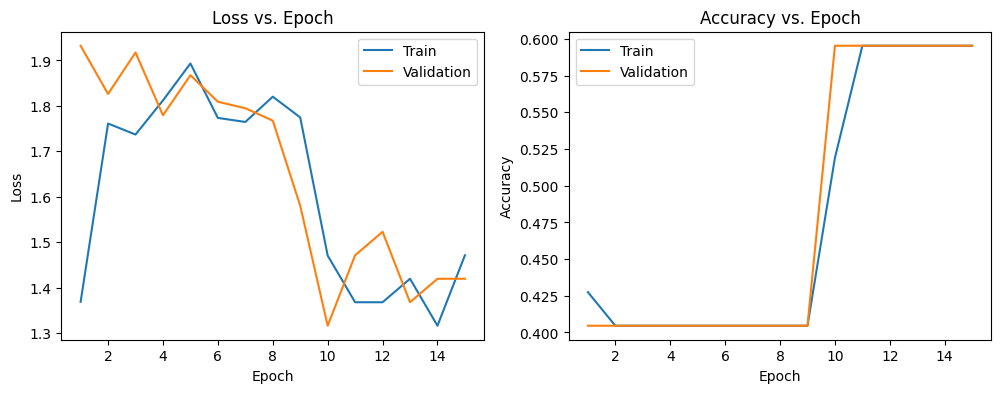

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label="Train")
plt.plot(range(1, num_epochs+1), val_losses, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accs, label="Train")
plt.plot(range(1, num_epochs+1), val_accs, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Epoch")
plt.legend()

plt.show()

In [22]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtener las predicciones en el conjunto de validación
y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred)

# Obtener las verdaderas etiquetas en el conjunto de validación
y_true = validation_generator.classes

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

print("Matriz de confusión:")
print(cm)

# Creamos una visualización de la matriz de confusión usando seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusión")
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Verdaderas")
plt.show()


AttributeError: ignored

Other Form

In [6]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

# Definir la transformación que se aplica a las imágenes
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Cargar los datos de validación
validation_data = ImageFolder("/content/drive/MyDrive/Pytorch_Tensorflow/Images_Clasification/Own-data-clasification/", transform=transform)
validation_loader = DataLoader(validation_data, batch_size=32, shuffle=False, num_workers=4)

# Entrenamiento y validación
for epoch in range(num_epochs):
    # Entrenamiento
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.float().unsqueeze(1))
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        total_train += len(labels)
        train_acc += (outputs.round() == labels.unsqueeze(1)).sum().item()

    # Validación
    model.eval()
    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels.float().unsqueeze(1))

            val_loss += loss.item()
            total_val += len(labels)
            val_acc += (outputs.round() == labels.unsqueeze(1)).sum().item()
    
    train_losses.append(train_loss / total_train)
    val_losses.append(val_loss / total_val)
    train_accs.append(train_acc / total_train)
    val_accs.append(val_acc / total_val)
    print(f"Epoch {epoch+1}/{num_epochs} -- Train Loss: {train_losses[-1]:.4f} -- Val Loss: {val_losses[-1]:.4f} -- Train Accuracy: {train_accs[-1]:.4f} -- Val Accuracy: {val_accs[-1]:.4f}")


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 1/15 -- Train Loss: 1.2398 -- Val Loss: 1.2643 -- Train Accuracy: 0.5840 -- Val Accuracy: 0.5954
Epoch 2/15 -- Train Loss: 1.2997 -- Val Loss: 1.2643 -- Train Accuracy: 0.5878 -- Val Accuracy: 0.5954
Epoch 3/15 -- Train Loss: 1.3425 -- Val Loss: 1.2643 -- Train Accuracy: 0.5897 -- Val Accuracy: 0.5954
Epoch 4/15 -- Train Loss: 1.3786 -- Val Loss: 1.2643 -- Train Accuracy: 0.5908 -- Val Accuracy: 0.5954
Epoch 5/15 -- Train Loss: 1.3940 -- Val Loss: 1.2643 -- Train Accuracy: 0.5916 -- Val Accuracy: 0.5954
Epoch 6/15 -- Train Loss: 1.3902 -- Val Loss: 1.2643 -- Train Accuracy: 0.5921 -- Val Accuracy: 0.5954
Epoch 7/15 -- Train Loss: 1.4003 -- Val Loss: 1.2643 -- Train Accuracy: 0.5926 -- Val Accuracy: 0.5954
Epoch 8/15 -- Train Loss: 1.3852 -- Val Loss: 1.2643 -- Train Accuracy: 0.5929 -- Val Accuracy: 0.5954
Epoch 9/15 -- Train Loss: 1.3886 -- Val Loss: 1.2643 -- Train Accuracy: 0.5931 -- Val Accuracy: 0.5954
Epoch 10/15 -- Train Loss: 1.3867 -- Val Loss: 1.2643 -- Train Accuracy: 